In [1]:
import matplotlib.pyplot as plt

import utils

  analysing data from ../retrieval_outputs/eq_band_K_B_ret_2/test_.txt


100%|██████████| 1201/1201 [00:05<00:00, 239.43it/s]


  analysing data from ../retrieval_outputs/spot_K_B_ret_19/test_.txt


100%|██████████| 1201/1201 [00:05<00:00, 238.79it/s]


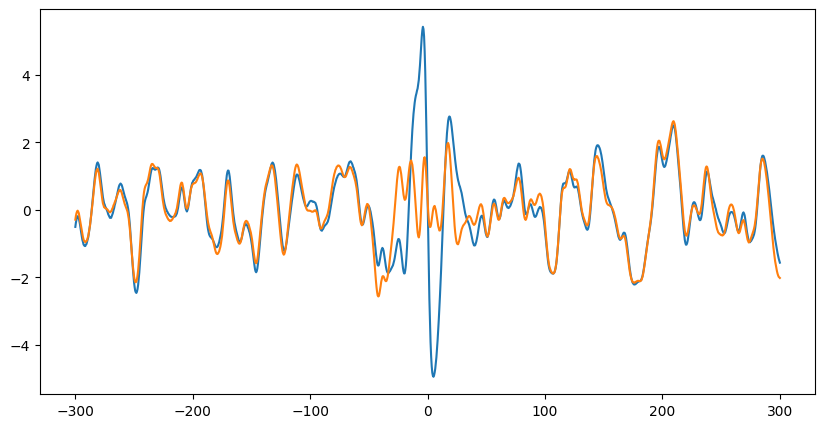

In [2]:
Res_1 = utils.RetrievalResults(prefix='../retrieval_outputs/eq_band_K_B_ret_2/test_')
_, flux_global, Rot_1     = Res_1.get_model_spec(is_local=False)
wave_local, flux_local, _ = Res_1.get_model_spec(is_local=True)
rv, CCF, CCF_SNR_1 = Res_1.get_CCF(
    wave_local, flux_local, flux_global, 
    subtract_global=True, 
    )

#'''
Res_2 = utils.RetrievalResults(prefix='../retrieval_outputs/spot_K_B_ret_19/test_')
_, flux_global, Rot_2     = Res_2.get_model_spec(is_local=False)
wave_local, flux_local, _ = Res_2.get_model_spec(is_local=True)
rv, CCF, CCF_SNR_2 = Res_2.get_CCF(
    wave_local, flux_local, flux_global, 
    subtract_global=True, 
    )

plt.figure(figsize=(10,5))
plt.plot(rv, CCF_SNR_1)
plt.plot(rv, CCF_SNR_2)
plt.show()
#'''

In [3]:
*_, Rot_2_spot = Res_2.get_model_spec(is_local=False, m_set='K2166_spot')
Res_2.add_patch_to_Rot(Rot_2, Rot_2_spot)

In [4]:
import matplotlib as mpl
import numpy as np

cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#4A0C0C','#fff0e6'])
#cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#6C0000','#fff0e6'])
cmap.set_bad('w'); cmap.set_over('w'); cmap.set_under('k')

In [5]:
Res_1.bestfit_params.keys(), Res_2.bestfit_params.keys()

(dict_keys(['K2166_cloudy']), dict_keys(['K2166_cloudy', 'K2166_spot']))

In [6]:
vsini_1 = Res_1.bestfit_params['K2166_cloudy']['vsini']
vsini_2 = Res_2.bestfit_params['K2166_cloudy']['vsini']

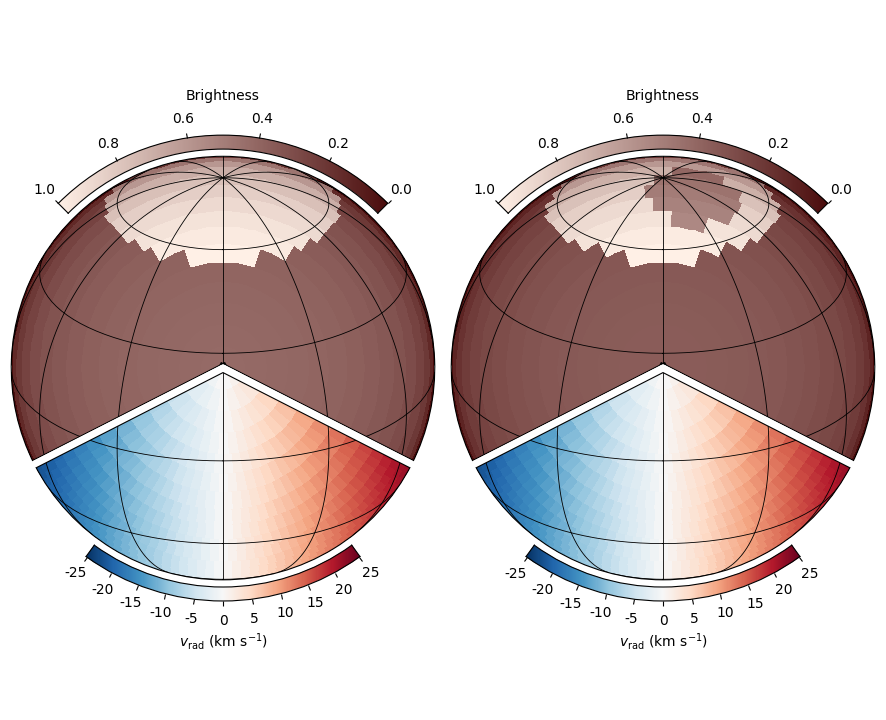

In [36]:
fig = plt.figure(figsize=(5.5*2,5.5))
gs = fig.add_gridspec(nrows=1, ncols=1, hspace=0, wspace=0)

ax = np.array([
    fig.add_subplot(gs[0,0], projection='polar'), 
    fig.add_subplot(gs[0,0], projection='polar'), 
    fig.add_subplot(gs[0,0], projection='polar'), 
    fig.add_subplot(gs[0,0], projection='polar'), 
    ])
cax = np.array([
    fig.add_subplot(gs[0,0], projection='polar'), 
    fig.add_subplot(gs[0,0], projection='polar'), 
    fig.add_subplot(gs[0,0], projection='polar'), 
    fig.add_subplot(gs[0,0], projection='polar'), 
    ])

sphere = utils.SpherePlot(Rot_1, fig, ax[0], cax[0])
sphere.plot_map(
    attr='int_flux', cmap=cmap, edgecolors='face', lw=1e-6, 
    )
sphere.configure_ax(
    xlim=np.pi/2 + 1/2*1.3*np.pi*np.array([-1,1]), 
    sep_spine_lw=5, grid_lw=0.6
    )
sphere.configure_cax(
    label='Brightness', xlim=(1/4*np.pi,3/4*np.pi), cb_width=0.06, flip_cb=True, 
    xticks=[0.0,0.2,0.4,0.6,0.8,1.0], vmin=0., vmax=1., cmap=cmap
    )

sphere = utils.SpherePlot(Rot_1, fig, ax[1], cax[1])
sphere.plot_map(
    attr='v_grid', cmap='RdBu_r', edgecolors='face', lw=1e-6, 
    )
sphere.configure_ax(
    xlim=-np.pi/2 + 1/2*(2-1.3)*np.pi*np.array([-1,1]), 
    sep_spine_lw=5, grid_lw=0.6
    )
sphere.configure_cax(
    label=r'$v_\mathrm{rad}\ (\mathrm{km\ s^{-1}})$', 
    xlim=(-np.pi/2-np.pi/5,-np.pi/2+np.pi/5), cb_width=0.06, 
    xticks=np.arange(-25,25+1,5), vmin=-vsini_1, vmax=vsini_1, cmap='RdBu_r'
    )

####################
sphere = utils.SpherePlot(Rot_2, fig, ax[2], cax[2])
sphere.plot_map(
    attr='int_flux', cmap=cmap, edgecolors='face', lw=1e-6, 
    )
sphere.configure_ax(
    xlim=np.pi/2 + 1/2*1.3*np.pi*np.array([-1,1]), 
    sep_spine_lw=5, grid_lw=0.6
    )
sphere.configure_cax(
    label='Brightness', xlim=(1/4*np.pi,3/4*np.pi), cb_width=0.06, flip_cb=True, 
    xticks=[0.0,0.2,0.4,0.6,0.8,1.0], vmin=0., vmax=1., cmap=cmap
    )
l, b, w, h = ax[2].get_position().bounds
ax[2].set_position([l+0.4, b, w, h])
l, b, w, h = cax[2].get_position().bounds
cax[2].set_position([l+0.4, b, w, h])

sphere = utils.SpherePlot(Rot_2, fig, ax[3], cax[3])
sphere.plot_map(
    attr='v_grid', cmap='RdBu_r', edgecolors='face', lw=1e-6, 
    )
sphere.configure_ax(
    xlim=-np.pi/2 + 1/2*(2-1.3)*np.pi*np.array([-1,1]), 
    sep_spine_lw=5, grid_lw=0.6
    )
sphere.configure_cax(
    label=r'$v_\mathrm{rad}\ (\mathrm{km\ s^{-1}})$', 
    xlim=(-np.pi/2-np.pi/5,-np.pi/2+np.pi/5), cb_width=0.06, 
    xticks=np.arange(-25,25+1,5), vmin=-vsini_2, vmax=vsini_2, cmap='RdBu_r'
    )
l, b, w, h = ax[3].get_position().bounds
ax[3].set_position([l+0.4, b, w, h])
l, b, w, h = cax[3].get_position().bounds
cax[3].set_position([l+0.4, b, w, h])

#plt.show()
#right, top = fig.get_size_inches()
#bbox = mpl.transforms.Bbox([[0.3,0.0-0.15],[right-0.3,top+0.15]])
#plt.savefig('./plots/test.pdf', bbox_inches=bbox)
plt.show()
plt.close()